# EDA for victorian era author attribution dataset
For explanation, please see the full report.

In [ ]:
import pandas as pd
encodings = ['utf-8', 'latin1', 'iso-8859-1', 'cp1252']

file_path = "./Gungor_2018_VictorianAuthorAttribution_data.csv"
for enc in encodings:
    try:
        data = pd.read_csv(file_path, encoding='latin1')
        print(f"Successfully read data with encoding: {enc}")
        print(data.head())
        break
    except UnicodeDecodeError:
        print(f"Failed to read data with encoding: {enc}")

data

Successfully read data with encoding: utf-8
                                                text  author
0  ou have time to listen i will give you the ent...       1
1  wish for solitude he was twenty years of age a...       1
2  and the skirt blew in perfect freedom about th...       1
3  of san and the rows of shops opposite impresse...       1
4  an hour s walk was as tiresome as three in a s...       1


,text,author
0,ou have time to listen i will give you the ent...,1
1,wish for solitude he was twenty years of age a...,1
2,and the skirt blew in perfect freedom about th...,1
3,of san and the rows of shops opposite impresse...,1
4,an hour s walk was as tiresome as three in a s...,1
...,...,...
53673,after surrounding and searching the whole plac...,50
53674,giant who could make a young earthquake or a w...,50
53675,waters of the lake at the bottom of the hill c...,50
53676,fingers and thumb in it exactly as it came out...,50


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split

X = data['text']
y = data['author']

In [ ]:
y.unique()

array([ 1,  2,  3,  4,  6,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 50])

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the training data, transform the testing data
X_counts = vectorizer.fit_transform(X)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()

model.fit(X_counts, y)

/home/nick/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [9]:
print(X[0])
print(X_counts[0].shape)

ou have time to listen i will give you the entire story he said it may form the basis of a future novel and prove quite as interesting as one of your own invention i had the time to listen of course one has time for anything and everything agreeable in the best place to hear the tale was in a victoria and with my good on the box with the coachman we set out at once on a drive to the as the recital was only half through when we reached the house we postponed the remainder while we stopped there for an excellent lunch on the way back to my friend continued and finished the story it was indeed quite suitable for use and i told my friend with thanks that i should at once put it in shape for my readers i said i should make a few alterations in it for the sake of dramatic interest but in the main would follow the lines he had given me it would spoil my romance were i to answer on this page the question that must be uppermost in the reader s mind i have already revealed almost too much of the

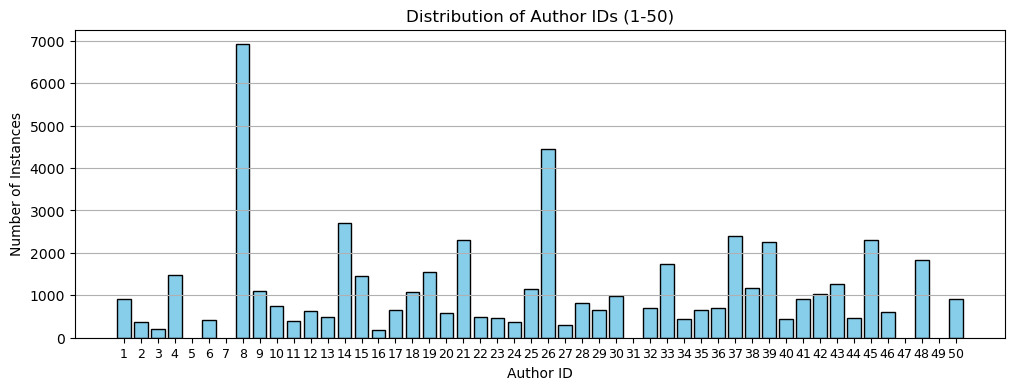

[ 912  382  213 1483  407 6914 1108  755  383  627  485 2696 1460  183
  660 1078 1543  587 2307  495  455  380 1159 4441  306  823  645  972
  703 1742  453  659  693 2387 1163 2266  430  911 1022 1266  468 2312
  605 1825  914]
1192.8444444444444
1185.0881065333976


In [20]:
import numpy as np
import matplotlib.pyplot as plt

values, counts = np.unique(y, return_counts=True)
plt.figure(figsize=(12, 4))
plt.bar(values, counts, color='skyblue', edgecolor='black')
plt.xlabel('Author ID')
plt.ylabel('Number of Instances')
plt.title('Distribution of Author IDs (1-50)')
plt.xticks(np.arange(1, 51), size=9)  # Ensure all numbers 1-50 are shown on x-axis
plt.grid(axis='y')

# Show the plot
plt.show()
print(counts)
print(np.mean(counts))
print(np.std(counts))

In [26]:
feature_names = vectorizer.get_feature_names_out()
coefficients = model.coef_

# Note: not zero-indexed, indexes range from 1 to 50.
class_index = list(model.classes_).index(1)
class_coefficients = coefficients[class_index]
coef_df = pd.DataFrame({
    'feature': feature_names,
    'coefficient': class_coefficients
})

coef_df = coef_df.sort_values(by='coefficient', ascending=False)

print(coef_df.head(10))  # Top positive features for author 1
print(coef_df.tail(10))  # Top negative features for author 1


       feature  coefficient
9692      when     0.299337
1915     could     0.227962
9958     young     0.210847
3768      girl     0.195558
8835     there     0.182705
6001       one     0.159230
9874     would     0.144332
4365        if     0.143598
8535     sugar     0.136784
396   anything     0.135238
      feature  coefficient
2602     down    -0.146269
9355       up    -0.148995
750        be    -0.153861
7977      sir    -0.161933
5870      now    -0.166915
9707    which    -0.168180
4187  himself    -0.175870
1169       by    -0.221316
1158      but    -0.232195
8087       so    -0.268576


In [27]:
other_coefficients = coefficients.mean(axis=0)
coef_df['mean_other_coefficients'] = other_coefficients
coef_df['difference'] = coef_df['coefficient'] - coef_df['mean_other_coefficients']

coef_df = coef_df.sort_values(by='difference', ascending=False)

print("Top features FOR author compared to all others:")
print(coef_df.head(10))

print("Top features AGAINST author compared to all others:")
print(coef_df.tail(10))


Top features FOR author compared to all others:
       feature  coefficient  mean_other_coefficients  difference
9692      when     0.299337             8.211024e-18    0.299337
1915     could     0.227962            -3.913970e-18    0.227962
9958     young     0.210847             5.637851e-19    0.210847
3768      girl     0.195558             2.614132e-18    0.195558
8835     there     0.182705            -3.893490e-18    0.182705
6001       one     0.159230            -6.052257e-18    0.159230
9874     would     0.144332             5.778557e-17    0.144332
4365        if     0.143598             2.987579e-18    0.143598
8535     sugar     0.136784            -1.103477e-18    0.136784
396   anything     0.135238             1.185394e-18    0.135238
Top features AGAINST author compared to all others:
      feature  coefficient  mean_other_coefficients  difference
2602     down    -0.146269            -1.730869e-17   -0.146269
9355       up    -0.148995            -1.326100e-17   -0.

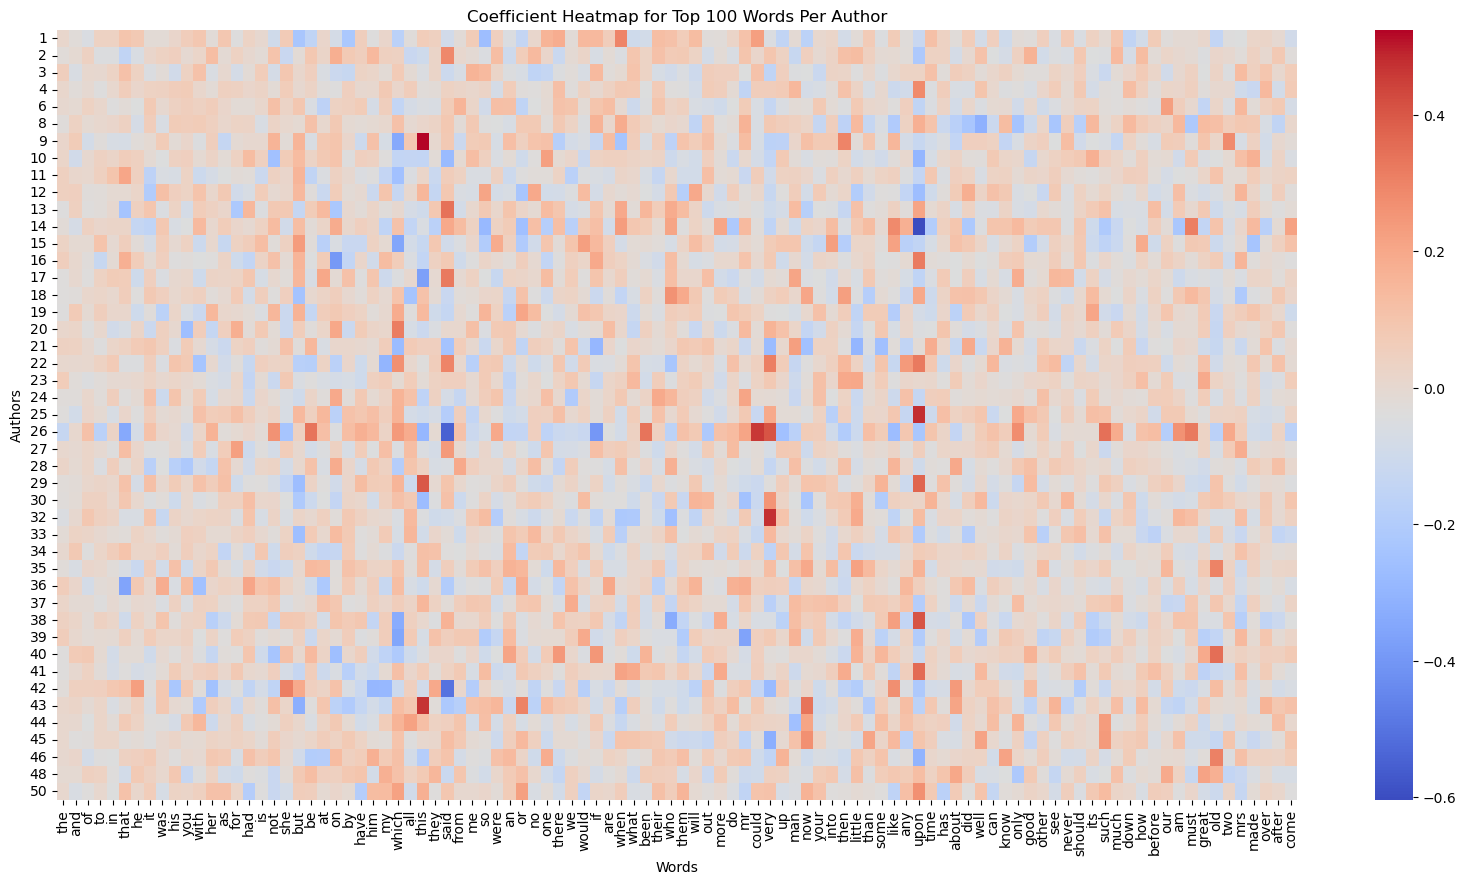

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

feature_names = vectorizer.get_feature_names_out()

word_freq = np.asarray(X_counts.sum(axis=0)).flatten()

word_freq_df = pd.DataFrame({
    'word': feature_names,
    'frequency': word_freq
})

top_words = word_freq_df.nlargest(100, 'frequency')['word'].tolist()
coefficients = model.coef_

top_word_indices = [vectorizer.vocabulary_[word] for word in top_words]
coeff_matrix = coefficients[:, top_word_indices]

coef_df = pd.DataFrame(coeff_matrix, columns=top_words, index=model.classes_)

plt.figure(figsize=(20, 10))
sns.heatmap(coef_df, cmap="coolwarm", xticklabels=top_words, yticklabels=model.classes_)
plt.title("Coefficient Heatmap for Top 100 Words Per Author")
plt.xlabel("Words")
plt.ylabel("Authors")
plt.show()


In [36]:
np.mean(coef_df.iloc[:,0])

2.5648696129939216e-14

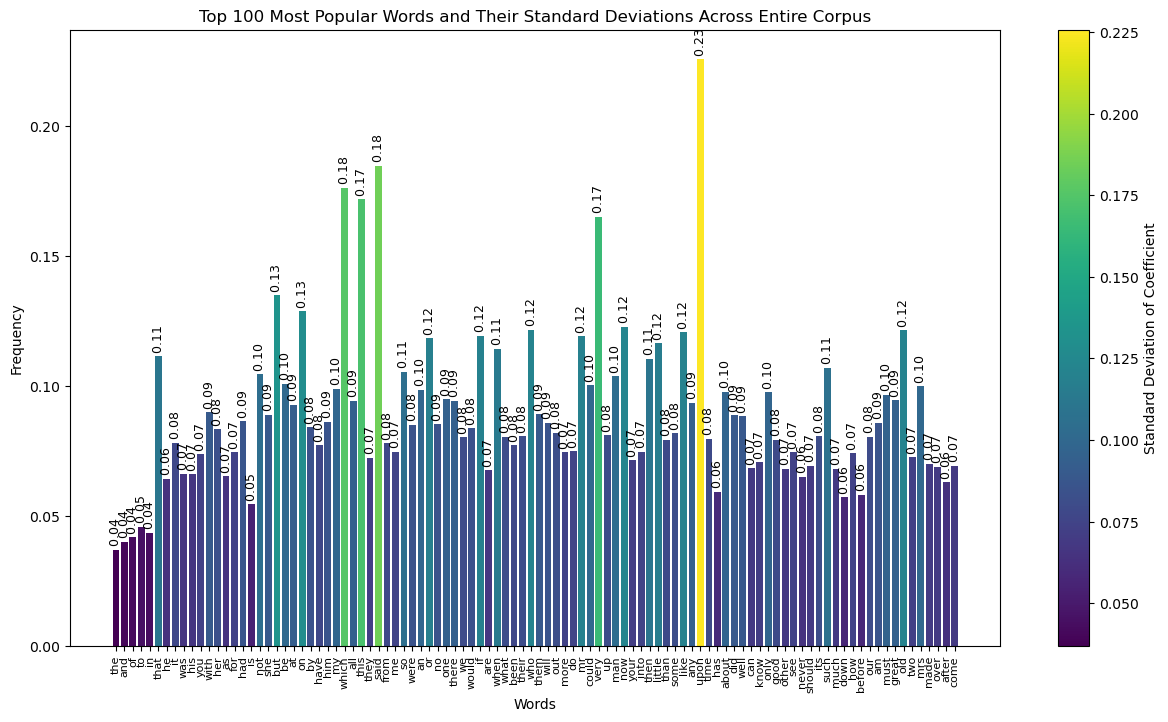

In [42]:
from matplotlib.colors import Normalize


top_words_df = word_freq_df.nlargest(100, 'frequency')
top_word_coefs = coefficients[:, top_word_indices]


std_devs = np.std(top_word_coefs, axis=0)

top_words_df['std_dev'] = std_devs

plt.figure(figsize=(15, 8))
norm = Normalize(vmin=min(top_words_df['std_dev']), vmax=max(top_words_df['std_dev']))
bars = plt.bar(top_words_df['word'], top_words_df['std_dev'], color=sns.color_palette("viridis", as_cmap=True)(norm(top_words_df['std_dev'])))

for bar, std in zip(bars, top_words_df['std_dev']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f' {std:.2f} ', ha='center', va='bottom', rotation=90, size=9)

sm = plt.cm.ScalarMappable(cmap="viridis", norm=plt.Normalize(vmin=min(top_words_df['std_dev']), vmax=max(top_words_df['std_dev'])))
sm.set_array([])
plt.colorbar(sm, label='Standard Deviation of Coefficient')

plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 100 Most Popular Words and Their Standard Deviations Across Entire Corpus')
plt.xticks(rotation=90, size=8)
plt.show()


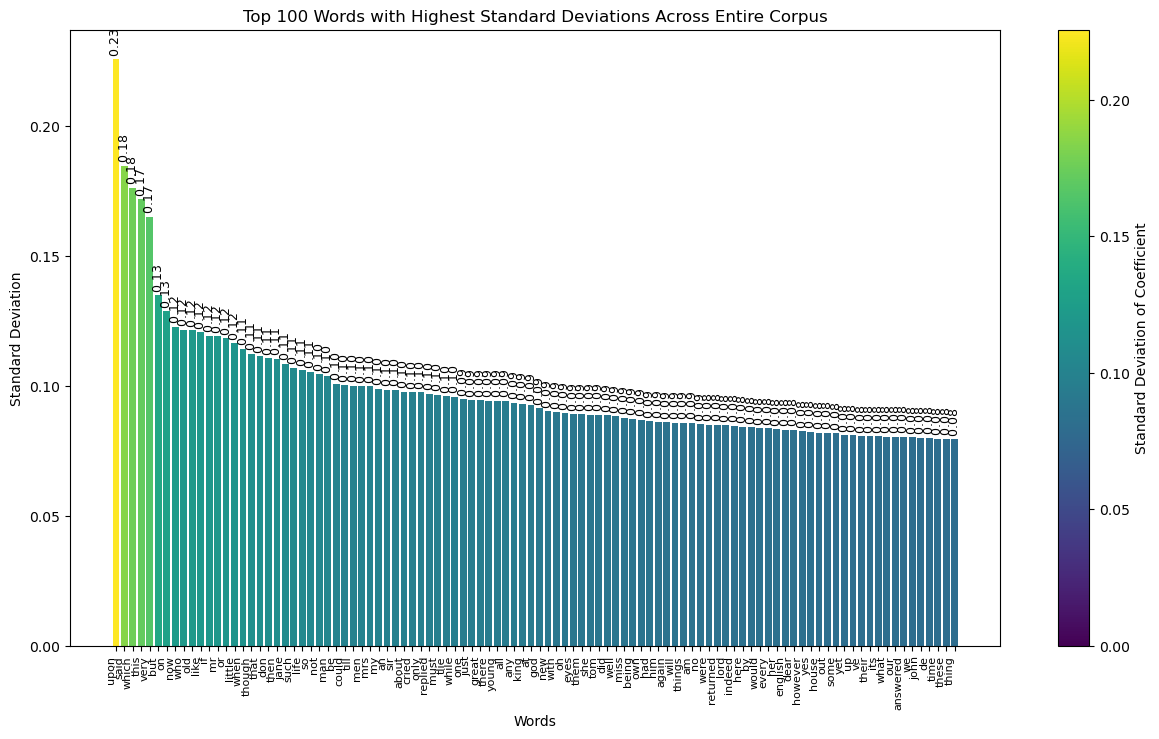

In [43]:
feature_names = vectorizer.get_feature_names_out()
all_coefficients = model.coef_

std_devs = np.std(all_coefficients, axis=0)

std_dev_df = pd.DataFrame({
    'word': feature_names,
    'std_dev': std_devs
})

top_std_dev_df = std_dev_df.nlargest(100, 'std_dev')

norm = Normalize(vmin=0, vmax=top_std_dev_df['std_dev'].max())

plt.figure(figsize=(15, 8))
bars = plt.bar(top_std_dev_df['word'], top_std_dev_df['std_dev'], color=sns.color_palette("viridis", as_cmap=True)(norm(top_std_dev_df['std_dev'])))

for bar, std in zip(bars, top_std_dev_df['std_dev']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f' {std:.2f}', ha='center', va='bottom', size=9, rotation=90)

sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
plt.colorbar(sm, label='Standard Deviation of Coefficient')

plt.xticks(rotation=90, ha='right', size=8)
plt.xlabel('Words')
plt.ylabel('Standard Deviation')
plt.title('Top 100 Words with Highest Standard Deviations Across Entire Corpus')
plt.show()

In [ ]:
len(all_coefficients)

45

In [ ]:
print(top_words_df)

       word  frequency   std_dev
8819    the    2513907  0.046502
346     and    1520464  0.052043
5960     of    1427365  0.051749
8983     to    1238298  0.055168
4464     in     767174  0.059867
...     ...        ...       ...
5285   made      53407  0.092045
5668    mrs      53314  0.130810
6095   over      52969  0.089044
215   after      52267  0.078835
1573   come      52100  0.090537

[100 rows x 3 columns]


In [44]:
words_only_in_top_words = set(top_words_df['word']) - set(top_std_dev_df['word'])
words_only_in_top_std_dev = set(top_std_dev_df['word']) - set(top_words_df['word'])

print("Words only in top_words_df:", words_only_in_top_words)
print("Words only in top_std_dev_df:", words_only_in_top_std_dev)


Words only in top_words_df: {'as', 'come', 'see', 'after', 'are', 'into', 'can', 'have', 'from', 'and', 'was', 'do', 'good', 'his', 'your', 'much', 'they', 'over', 'of', 'it', 'than', 'know', 'made', 'in', 'to', 'the', 'is', 'been', 'never', 'has', 'he', 'how', 'before', 'should', 'down', 'for', 'more', 'two', 'me', 'you', 'other'}
Words only in top_std_dev_df: {'being', 'yes', 'replied', 'dear', 'however', 'jane', 'tom', 'these', 'yet', 'till', 'indeed', 'while', 'life', 'god', 'de', 'every', 'men', 'miss', 'tlie', 'young', 'returned', 'again', 'king', 'lord', 'just', 'sir', 'eyes', 'answered', 'new', 'john', 'cried', 've', 'thing', 'house', 'don', 'oh', 'english', 'here', 'own', 'though', 'things'}


In [ ]:
X_counts

<53678x9972 sparse matrix of type '<class 'numpy.int64'>'
	with 21051663 stored elements in Compressed Sparse Row format>

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, TruncatedSVD

from sklearn.cluster import KMeans
import seaborn as sns

,PC1,PC2,author
0,22.242161,5.549555,1
1,21.994209,5.533595,1
2,17.983113,-0.116169,1
3,10.818250,-4.388541,1
4,16.979040,-0.082396,1
...,...,...,...
53673,16.769401,-1.808352,50
53674,18.252316,3.174334,50
53675,10.798476,-3.735352,50
53676,9.982778,-6.299995,50


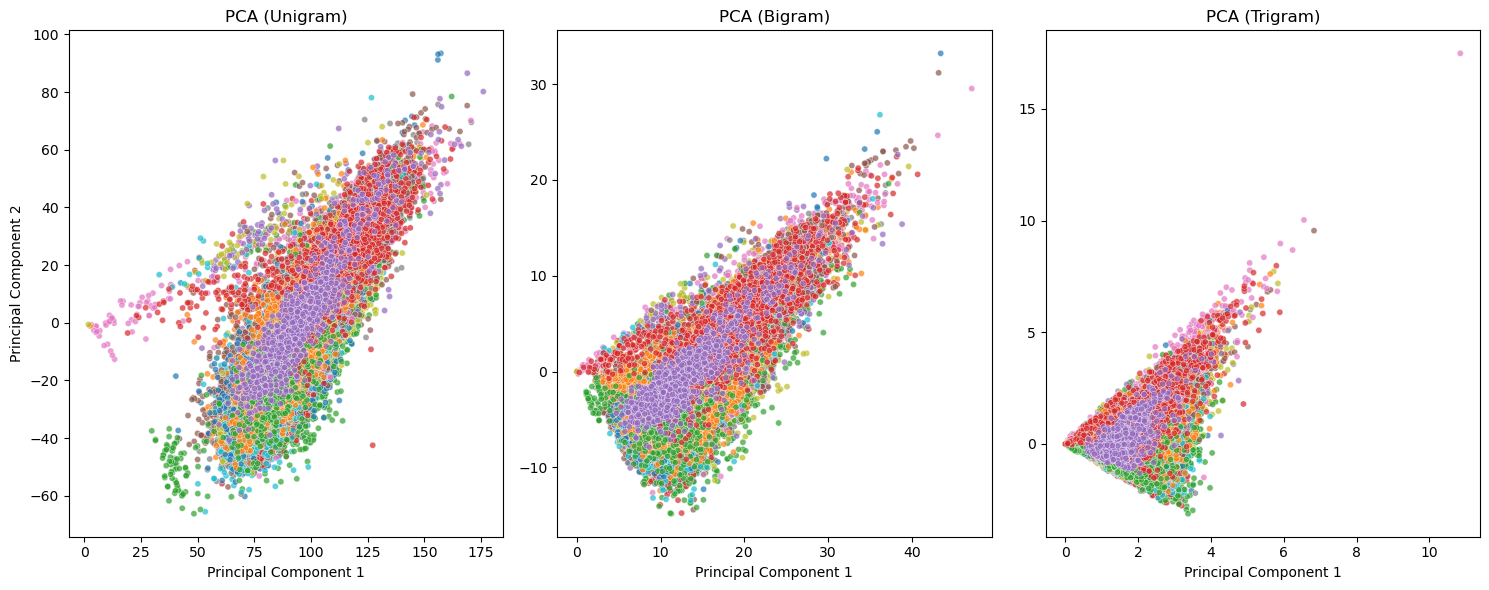

In [62]:
pca_dfs = [
    pd.read_csv("./victorian_author_attribution_pca_2.csv"),
    pd.read_csv("./2gram_victorian_author_attribution_pca_2.csv"),
    pd.read_csv("./3gram_victorian_author_attribution_pca_2.csv"),
]


# First plot
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
sns.scatterplot(ax=axes[0], data=pca_dfs[0], x='PC1', y='PC2', hue='author', palette='tab10', s=20, alpha=0.7)
axes[0].set_title('PCA (Unigram)')
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')
axes[0].get_legend().remove()
# axes[0].legend(title='Author ID', loc='right')

# Second plot
sns.scatterplot(ax=axes[1], data=pca_dfs[1], x='PC1', y='PC2', hue='author', palette='tab10', s=20, alpha=0.7)
axes[1].set_title('PCA (Bigram)')
axes[1].set_xlabel('Principal Component 1')
axes[1].set_ylabel('')
axes[1].get_legend().remove()
# axes[1].legend(title='Author ID', loc='right')

# Third plot
sns.scatterplot(ax=axes[2], data=pca_dfs[2], x='PC1', y='PC2', hue='author', palette='tab10', s=20, alpha=0.7)
axes[2].set_title('PCA (Trigram)')
axes[2].set_xlabel('Principal Component 1')
axes[2].set_ylabel('')
axes[2].get_legend().remove()
# axes[2].legend(title='Author ID', cols=2, loc='right')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
y.unique()

array([ 1,  2,  3,  4,  6,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 50])

/tmp/ipykernel_134288/2349420270.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  just_a_few_authors_2 = pca_df[pca_df['author'] > 10][pca_df['author'] < 14]
/tmp/ipykernel_134288/2349420270.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  just_a_few_authors_3 = pca_df[pca_df['author'] > 20][pca_df['author'] < 24]


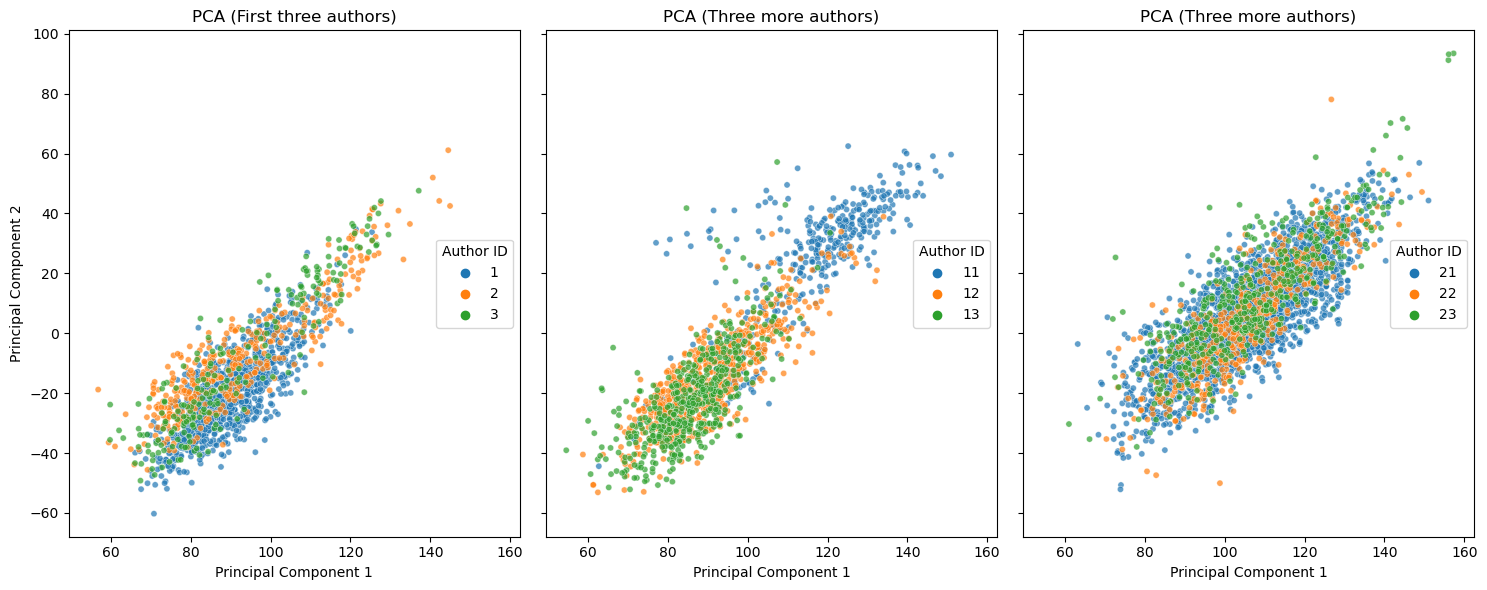

In [63]:
pca_df = pd.read_csv("./victorian_author_attribution_pca_2.csv")
just_a_few_authors_1 = pca_df[pca_df['author'] < 4]
just_a_few_authors_2 = pca_df[pca_df['author'] > 10][pca_df['author'] < 14]
just_a_few_authors_3 = pca_df[pca_df['author'] > 20][pca_df['author'] < 24]

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharex=True, sharey=True)

# First plot
sns.scatterplot(ax=axes[0], data=just_a_few_authors_1, x='PC1', y='PC2', hue='author', palette='tab10', s=20, alpha=0.7)
axes[0].set_title('PCA (First three authors)')
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')
axes[0].legend(title='Author ID', loc='right')

# Second plot
sns.scatterplot(ax=axes[1], data=just_a_few_authors_2, x='PC1', y='PC2', hue='author', palette='tab10', s=20, alpha=0.7)
axes[1].set_title('PCA (Three more authors)')
axes[1].set_xlabel('Principal Component 1')
axes[1].set_ylabel('')
axes[1].legend(title='Author ID', loc='right')

# Third plot
sns.scatterplot(ax=axes[2], data=just_a_few_authors_3, x='PC1', y='PC2', hue='author', palette='tab10', s=20, alpha=0.7)
axes[2].set_title('PCA (Three more authors)')
axes[2].set_xlabel('Principal Component 1')
axes[2].set_ylabel('')
axes[2].legend(title='Author ID', loc='right')

# Adjust layout
plt.tight_layout()
plt.show()

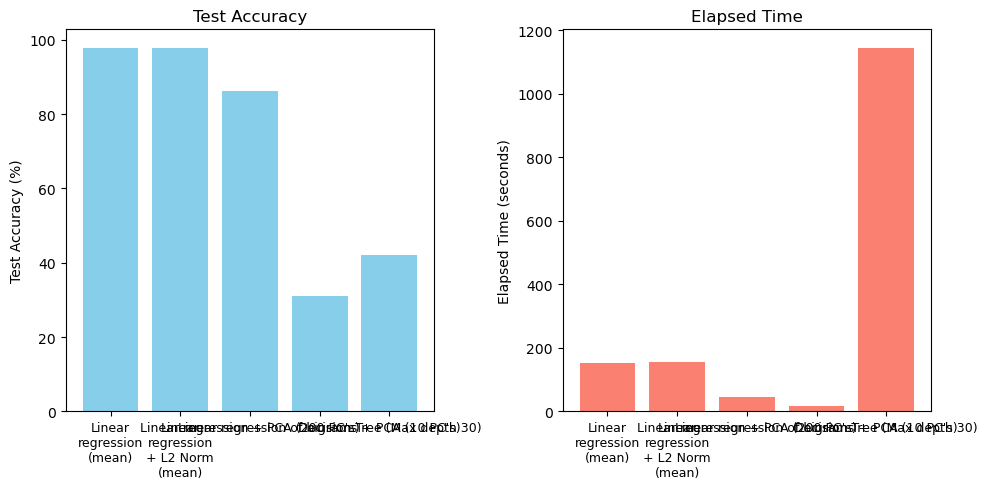

In [80]:
model_names = [
    "Linear\nregression\n(mean)",
    "Linear\nregression\n+ L2 Norm\n(mean)",
    "Linear\nregression\n+ PCA\n(200 PC's)",
    "Linear\nregression\nof bigrams\n+ PCA\n(10 PC's)",
    "Decision\nTree\n(Max depth 30)"
]

test_accuracy = [97.848, 97.957, 86.17, 31.08, 41.964]
elapsed_time = [151.67, 155.85, 45.40, 15.65, 1145.69]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].bar(model_names, test_accuracy, color='skyblue')
axs[0].set_title('Test Accuracy')
axs[0].set_ylabel('Test Accuracy (%)')
axs[0].tick_params(axis='x', labelsize=9)

axs[1].bar(model_names, elapsed_time, color='salmon')
axs[1].set_title('Elapsed Time')
axs[1].set_ylabel('Elapsed Time (seconds)')
axs[1].tick_params(axis='x', labelsize=9)

plt.tight_layout()
plt.show()
